In [1]:
import numpy as np
import pandas as pd
import random
import statistics
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import expon
import statsmodels.api as sm

from tabulate import tabulate

In [2]:
import scipy.stats as stats

In [3]:
#download data
from google.colab import files

uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [4]:
data_insurance = pd.read_csv("insurance.csv")
data_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#mencari rata-rata umur pengguna

mean_age = data_insurance["age"].mean()
print(mean_age)

39.20702541106129


In [6]:
len(data_insurance)
#print(sum(data_insurance["bmi"]) / len(data_insurance))

1338

In [7]:
#mencari rata-rata bmi
mean_bmi = data_insurance["bmi"].mean()
print(mean_bmi)

30.66339686098655


In [8]:
#mencari rata-rata tagihan
mean_charges = data_insurance["charges"].mean()
print(mean_charges)

13270.422265141257


In [9]:
variance = statistics.variance(data_insurance["charges"])
std = statistics.stdev(data_insurance["charges"])

print(variance)
print(std)

146652372.15285498
12110.011236694001


In [10]:
#mencari rata-rata bmi pengguna perokok dan rata-rata umurnya

data_smoker = data_insurance[data_insurance["smoker"]=="yes"]
mean_bmi_smoker = data_smoker["bmi"].mean()
mean_age_smoker = data_smoker["age"].mean()

print(mean_bmi_smoker)
print(mean_age_smoker)

30.70844890510949
38.51459854014598


In [11]:
#mencari varians charges untuk data perokok dan non perokok
data_non_smoker = data_insurance[data_insurance["smoker"]=="no"]


variance_smoker = statistics.variance(data_smoker["charges"])
variance_non_smoker = statistics.variance(data_non_smoker["charges"])


std_smoker = statistics.stdev(data_smoker["charges"])
std_non_smoker = statistics.stdev(data_non_smoker["charges"])

props_smoker = len(data_smoker) / len(data_insurance)
props_non_smoker = len(data_non_smoker) / len(data_insurance)

print(variance_smoker)
print(variance_non_smoker)
print("-----------")
print(std_smoker)
print(std_non_smoker)
print("-----------")
print(props_smoker)
print(props_non_smoker)

133207311.20634925
35925420.49611173
-----------
11541.547175589123
5993.781819194934
-----------
0.20478325859491778
0.7952167414050823


In [12]:
#encari rata-rata umur perokok male dan female
smoker_male = data_smoker[data_smoker["sex"]=="male"]
smoker_female = data_smoker[data_smoker["sex"]=="female"]

mean_smoker_male = smoker_male["age"].mean()
mean_smoker_female = smoker_female["age"].mean()

print(mean_smoker_male)
print(mean_smoker_female)

38.44654088050314
38.608695652173914


In [13]:
#mencari rata-rata tagihan perokok dan non perokok
mean_charges_smoker = data_smoker["charges"].mean()
mean_charges_non_smoker = data_non_smoker["charges"].mean()

print(mean_charges_smoker)
print(mean_charges_non_smoker)

32050.23183153284
8434.268297856204


In [14]:
#mencari rata-rata tagihan kesehatan perokok dan non perokok dengan BMi di atas 25
bmi_smoker_25 = data_smoker[data_smoker["bmi"]>25]
bmi_non_smoker_25 = data_non_smoker[data_non_smoker["bmi"]>25]

mean_charges_smoker_25 = bmi_smoker_25["charges"].mean()
mean_charges_non_smoker_25 = bmi_non_smoker_25["charges"].mean()

print(mean_charges_smoker_25)
print(mean_charges_non_smoker_25)

35116.90965694064
8629.589609712157


In [15]:
#mencari rata-rata BMI male dan female
data_male = data_insurance[data_insurance["sex"]=="male"]
data_female = data_insurance[data_insurance["sex"]=="female"]

mean_age_male = data_male["age"].mean()
mean_age_female = data_female["age"].mean()

bmi_male = data_male["bmi"].mean()
bmi_female = data_female["bmi"].mean()

print(mean_age_male)
print(mean_age_female)
print("---------------")
print(bmi_male)
print(bmi_female)

38.917159763313606
39.503021148036254
---------------
30.943128698224854
30.37774924471299


In [16]:
#mencari rata-rata BMI smoker dan non smoker
bmi_smoker = data_smoker["bmi"].mean()
bmi_non_smoker = data_non_smoker["bmi"].mean()

print(bmi_smoker)
print(bmi_non_smoker)

30.70844890510949
30.651795112781954


In [17]:
#mencari rata-rata tagihan dari tiap gender
mean_charges_male = data_male["charges"].mean()
mean_charges_female = data_female["charges"].mean()

print(mean_charges_male)
print(mean_charges_female)

13956.751177721893
12569.578843835347


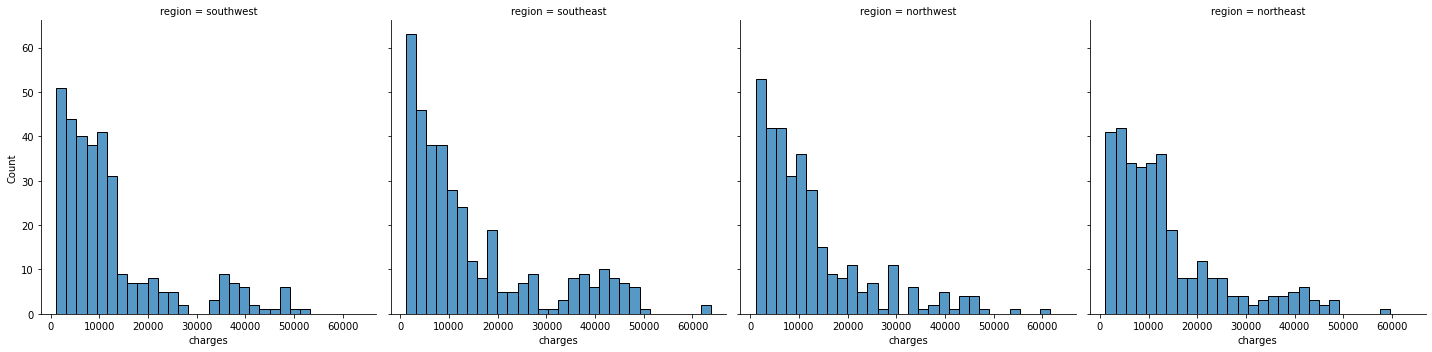

In [18]:
#mencari distribusi peluang tiap region
import seaborn as sns

sns.displot(data_insurance, x="charges", col="region")

In [19]:
#menghitung proporsi data banyak orang tiap region
southwest = data_insurance[data_insurance["region"]=="southwest"]
southeast = data_insurance[data_insurance["region"]=="southeast"]
northwest = data_insurance[data_insurance["region"]=="northwest"]
northeast = data_insurance[data_insurance["region"]=="northeast"]

props_southwest = len(southwest) / len(data_insurance)
props_southeast = len(southeast) / len(data_insurance)
props_northwest = len(northwest) / len(data_insurance)
props_northeast = len(northeast) / len(data_insurance)

print(props_southwest)
print(props_southeast)
print(props_northwest)
print(props_northeast)

0.2428998505231689
0.27204783258594917
0.2428998505231689
0.242152466367713


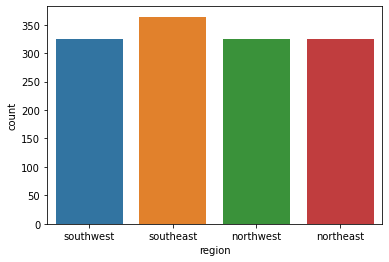

In [20]:
sns.countplot(x='region',data=data_insurance)

In [21]:
#menghitung proporsi perokok dan non perokok
prop_smoker = len(data_smoker) / len(data_insurance)
prop_non_smoker = len(data_non_smoker) / len(data_insurance)

print(prop_smoker)
print(prop_non_smoker)

0.20478325859491778
0.7952167414050823


In [22]:
#mencari peluang seorang tersebut female atau male jika diketaui perokok
probs_female_smoker = len(smoker_female)/len(data_smoker)
probs_male_smoker = len(smoker_male)/len(data_smoker)

print(probs_female_smoker)
print(probs_male_smoker)

0.4197080291970803
0.5802919708029197


In [23]:
#mencari peluang tagihan tiap region
all_charges = data_insurance["charges"].sum()

probs_charges_southwest = southwest["charges"].sum() / all_charges
probs_charges_southeast = southeast["charges"].sum() / all_charges
probs_charges_northwest = northwest["charges"].sum() / all_charges
probs_charges_northeast = northeast["charges"].sum() / all_charges

print(probs_charges_southwest)
print(probs_charges_southeast)
print(probs_charges_northwest)
print(probs_charges_northeast)

0.22599651943564628
0.30208057164798174
0.2272894669011652
0.24463344201520673


In [24]:
#mencari peluang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700
bmi_smoker_25_charges_16700 = bmi_smoker_25[bmi_smoker_25["charges"]>16700]
bmi_non_smoker_25_charges_16700 = bmi_non_smoker_25[bmi_non_smoker_25["charges"]>16700]

probs_smoker_25_charges_16700 = len(bmi_smoker_25_charges_16700) / len(bmi_smoker_25)
probs_non_smoker_25_charges_16700 = len(bmi_non_smoker_25_charges_16700) / len(bmi_non_smoker_25)
print(probs_smoker_25_charges_16700)
print(probs_non_smoker_25_charges_16700)

0.9817351598173516
0.0779816513761468


In [25]:
#mencari peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok
smoker_charges_167 = data_smoker[data_smoker["charges"]>16700]

probs_smoker_charges_167 = len(smoker_charges_167) / len(data_smoker)
print(probs_smoker_charges_167)


0.927007299270073


In [26]:
#mencari peluang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k
non_smoker_charges_167 = data_non_smoker[data_non_smoker["charges"]>16700]

probs_non_smoker_charges_167 = len(non_smoker_charges_167) / len(data_non_smoker)
print(probs_non_smoker_charges_167)

0.07518796992481203


In [27]:
#mencari peluang seseorang dengan BMI di atas dan di bawah 25 mendapatkan tagihan kesehatan diatas 16.7k
bmi_above_25 = data_insurance[data_insurance["bmi"]>25]
bmi_under_25 = data_insurance[data_insurance["bmi"]<25]

charges_above_25_167 = bmi_above_25[bmi_above_25["charges"]>16700]
charges_under_25_167 = bmi_under_25[bmi_under_25["charges"]>16700]
 
probs_bmi_above_25_167 = len(charges_above_25_167) / len(bmi_above_25)
probs_bmi_under_25_167 = len(charges_under_25_167) / len(bmi_under_25)

print(probs_bmi_above_25_167)
print(probs_bmi_under_25_167)

0.25939505041246563
0.20816326530612245


In [28]:
smoker_bmi_above_25 = data_smoker[data_smoker["bmi"]>25]
non_smoker_bmi_under_25 = data_non_smoker[data_non_smoker["bmi"]<25]




Text(0, 0.5, 'charges')

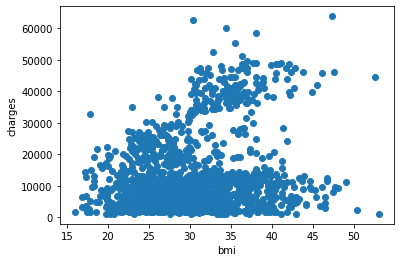

In [29]:
import matplotlib.pyplot as plt
plt.scatter(data_insurance['bmi'], data_insurance['charges'])
plt.xlabel('bmi')
plt.ylabel('charges')

In [30]:
data_insurance[['bmi','charges']].corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


In [31]:
data_insurance[['smoker','charges']].corr()

,charges
charges,1.0


In [32]:
data_insurance.corr(method ='pearson')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [33]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(data_insurance[data_insurance.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(data_insurance[data_insurance.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842179102e-283) < 0.05


In [34]:
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(data_insurance['sex'],data_insurance['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


In [35]:
# Chi_square test to check if smoking habits are different for people of different regions
Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(data_insurance['smoker'], data_insurance['region'])  

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Region has no effect on smoking habits as the p_value (0.062) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [36]:
crosstab = pd.crosstab(data_insurance['charges'],data_insurance['smoker']) 

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

print(p_value)

0.47943654572545824


In [44]:
# Chi_square test to check dependency of smoking on charges
Ho = "Smoker’s charges are higher than non smoker’s"   # Stating the Null Hypothesis
Ha = "Smoker’s charges are not higher than non smoker’s"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(data_insurance['smoker'], data_insurance['charges'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')
crosstab

Smoker’s charges are higher than non smoker’s as the p_value (0.47943654572545824) > 0.05


charges,1121.87390,1131.50660,1135.94070,1136.39940,1137.01100,1137.46970,1141.44510,1146.79660,1149.39590,1163.46270,...,48885.13561,48970.24760,49577.66240,51194.55914,52590.82939,55135.40209,58571.07448,60021.39897,62592.87309,63770.42801
smoker,,,,,,,,,,,,,,,,,,,,,
no,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
yes,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [42]:
# T-test to check dependency of BMI on charges
Ho = "Charges of BMI above 25 are higher than BMI under 25"   # Stating the Null Hypothesis
Ha = "Charges of BMI above 25 are not higher than BMI under 25"   # Stating the Alternate Hypothesis

x = np.array(data_insurance[data_insurance.bmi >= 25].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(data_insurance[data_insurance.bmi < 25].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of BMI above 25 are not higher than BMI under 25 as the p_value (1.8223060943569098e-05) < 0.05
